In [592]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [593]:
wine = pd.read_csv('wine-clustering.csv')

## Exploratory Data Analysis

In [594]:
sns.set()

In [595]:
wine.sample(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
97     12.29        1.41  1.98          16.0         85           2.55   
5      14.20        1.76  2.45          15.2        112           3.27   
91     12.00        1.51  2.42          22.0         86           1.45   
114    12.08        1.39  2.50          22.5         84           2.56   
42     13.88        1.89  2.59          15.0        101           3.25   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
97         2.50                  0.29             1.77             2.90  1.23   
5          3.39                  0.34             1.97             6.75  1.05   
91         1.25                  0.50             1.63             3.60  1.05   
114        2.29                  0.43             1.04             2.90  0.93   
42         3.56                  0.17             1.70             5.43  0.88   

     OD280  Proline  
97    2.74      428  
5     2.85     1450  
91    2.65      450  
114   3.19      385  
42    3.56     1095

In [596]:
wine.shape

(178, 13)

In [597]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [598]:
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [599]:
wine.duplicated().sum()

0

Imputation not needed

### Univariate analysis

#### Moments

In [600]:
wine.describe().T

count        mean         std     min       25%  \
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Ash_Alcanity          178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_Phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_Phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_Intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Alcohol                13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Ash_Alcanity           19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_Phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_Phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_Intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

we can see that the mean has varied range. We would want to Standardize the data.

#### Distributions

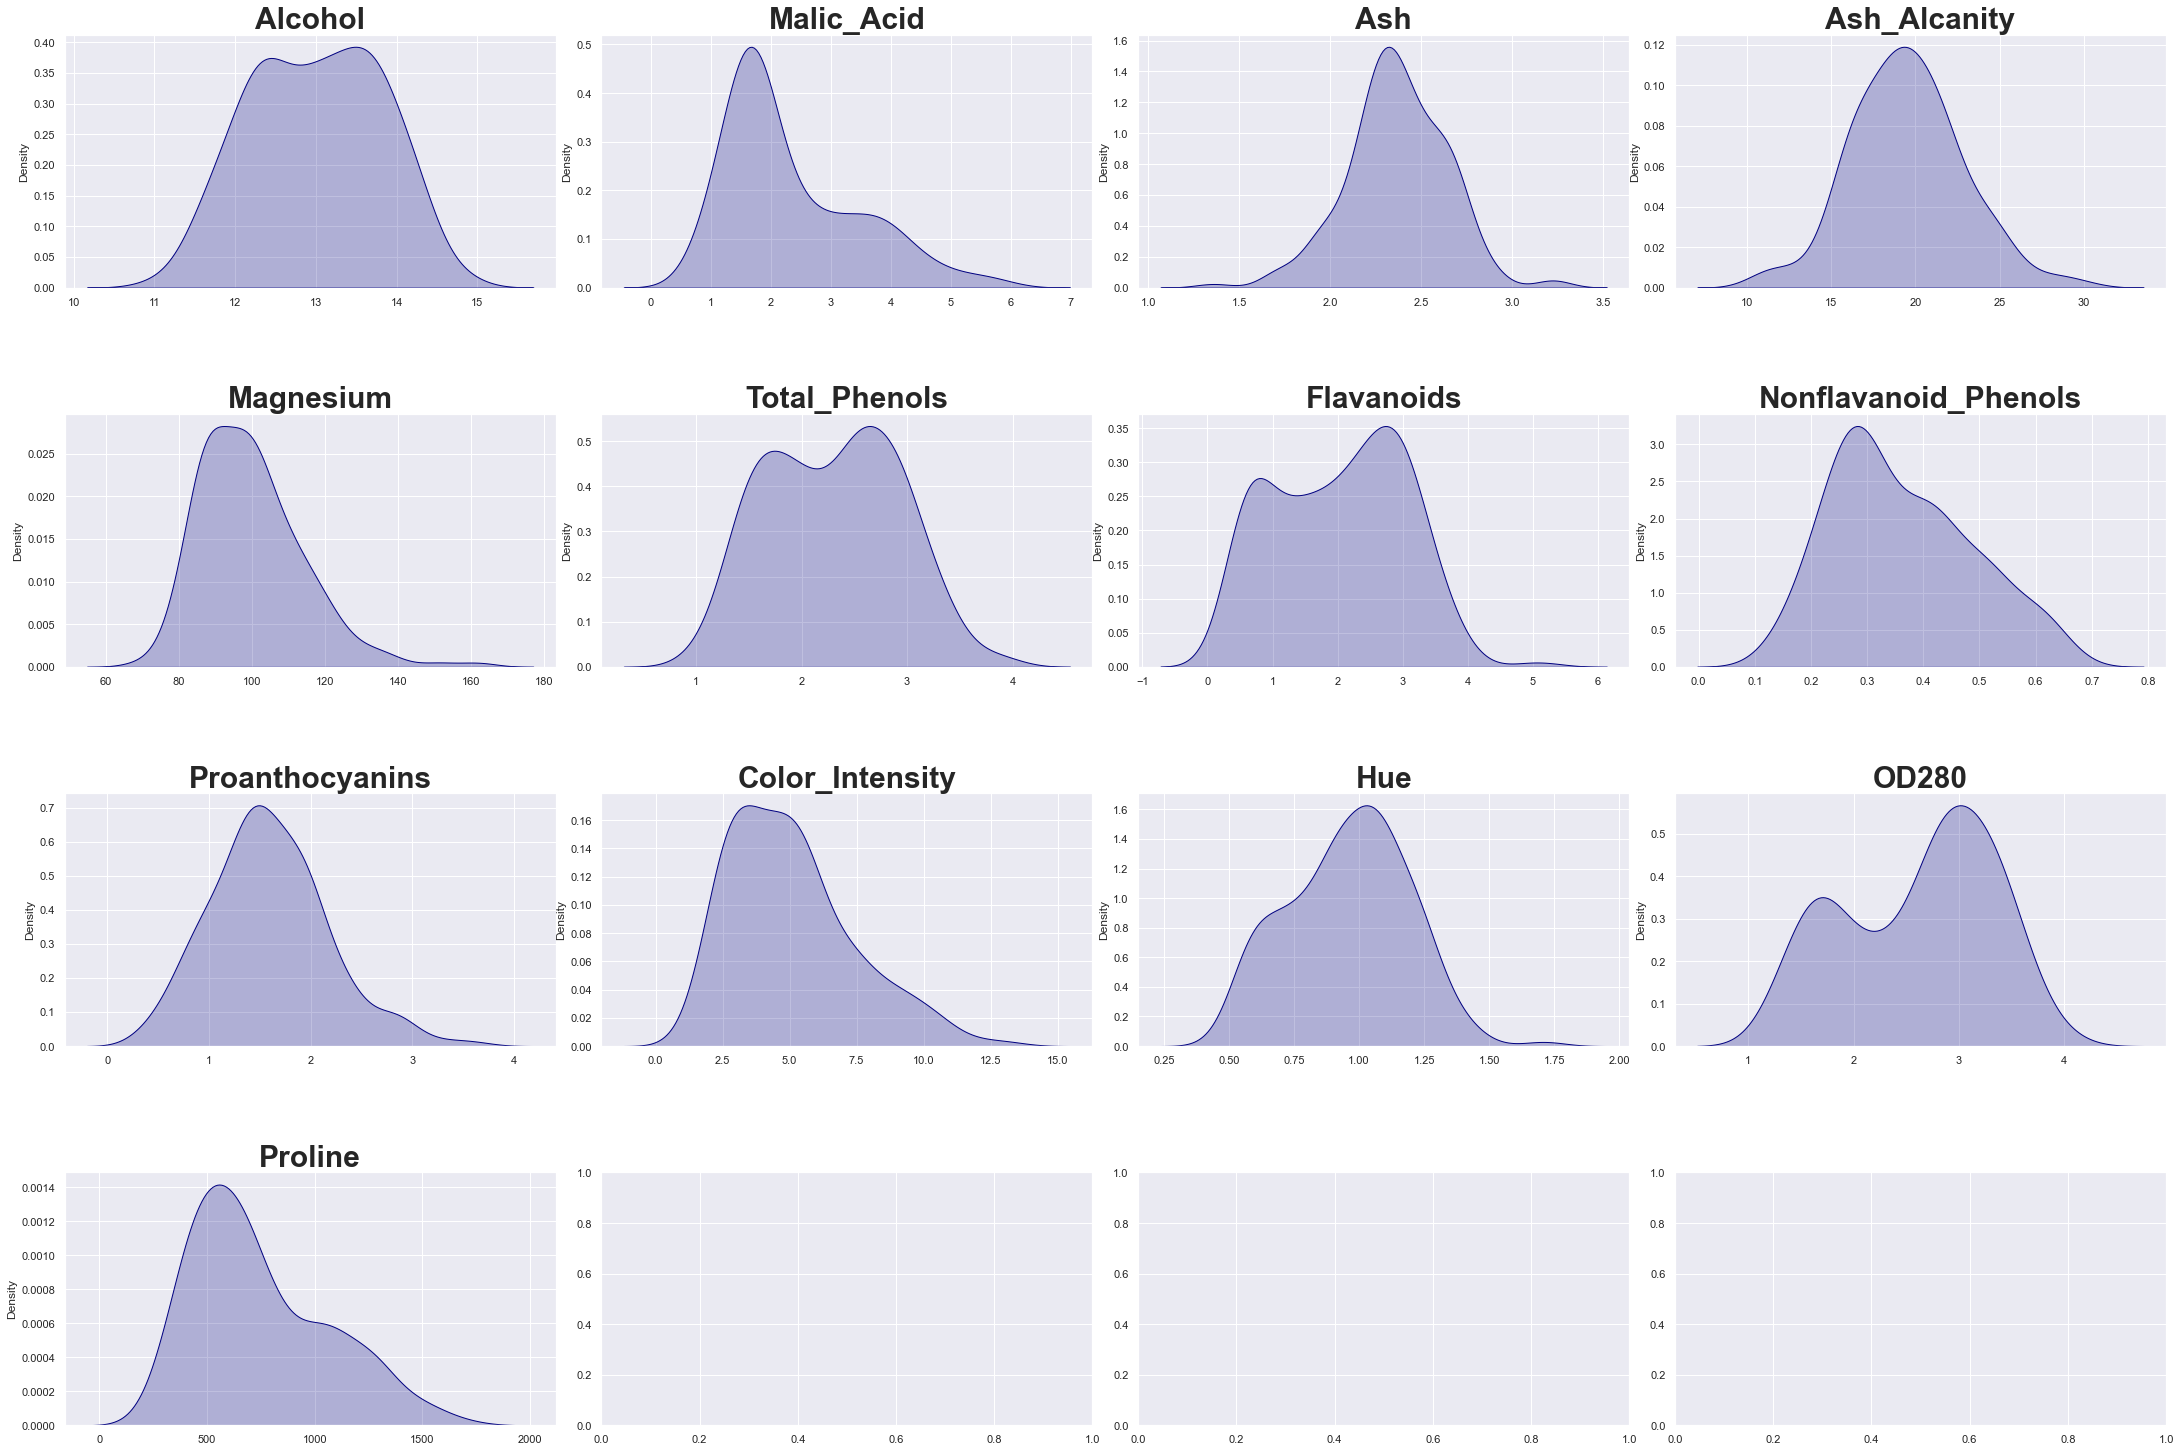

In [601]:
fig, axes = plt.subplots(4, 4, sharex=False, figsize=(30,20))
fig.tight_layout()
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[2,0],axes[2,1],axes[2,2],axes[2,3],axes[3,0]]
j=0
for col in wine.columns:
    p= sns.kdeplot(data=wine, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    #fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

**Observations:**  
    * Malic_Acid ,Proanthocyanins , Color_Intensity, Proline are right skewed  
    * Alcohol, Total_Phenols, Flavanoids, OD280  are bimodal  
    * Let's check the QQ plot for these columns

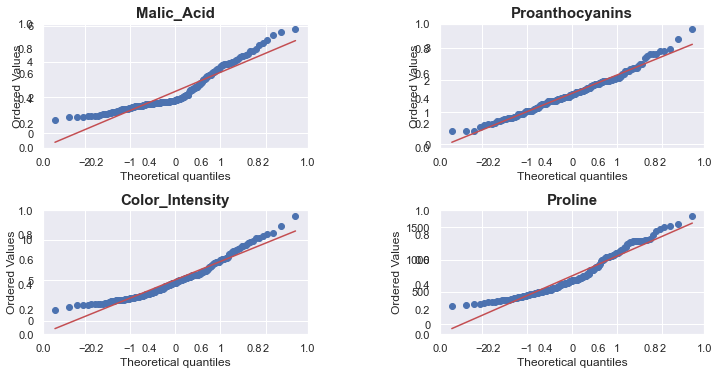

In [602]:
import scipy.stats as stats
import pylab
wine_skewed = pd.DataFrame([wine['Malic_Acid'],wine['Proanthocyanins'],wine['Color_Intensity'],wine['Proline']]).T
#cols = [wine['Malic_Acid'],wine['Proanthocyanins'],wine['Color_Intensity'],wine['Proline']]
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,5))
fig.tight_layout()
axeslist = [221,222,223,224]
j=0
for col in wine_skewed.columns:
    ax = fig.add_subplot(axeslist[j])
    p=stats.probplot(wine_skewed[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=15)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1

**Observations:**  
    * Malic_Acid and Proline are highly skewed   
    * Proanthocyanins and Color_Intensity have light skew  
    * We will apply 'yeo-johnson' PowerTransformer on  the above 4 features to normalize the distribution.  
      This will be done in Create Pipeline section  

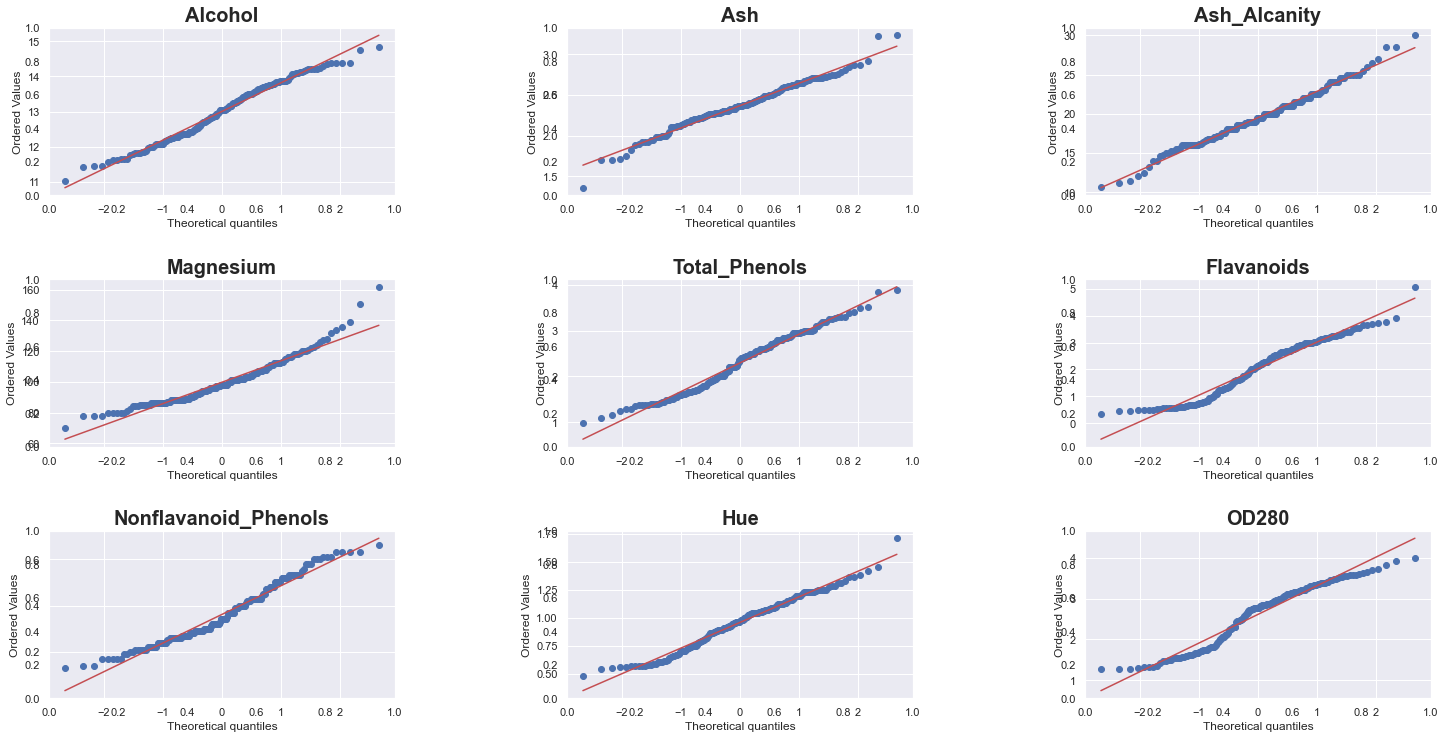

In [603]:
#Review QQ Plot for other normally distributed columns
wine_noskew = pd.DataFrame([wine['Alcohol'],wine['Ash'],wine['Ash_Alcanity'],wine['Magnesium'],wine['Total_Phenols'],wine['Flavanoids'],wine['Nonflavanoid_Phenols'],wine['Hue'],wine['OD280']]).T
fig, axes = plt.subplots(3, 3, sharex=False, figsize=(20,10))
fig.tight_layout()
axeslist = [331,332,333,334,335,336,337,338,339]
j=0
for col in wine_noskew.columns:
    ax = fig.add_subplot(axeslist[j])
    p=stats.probplot(wine_noskew[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1


**Observations:**  
    * Except for Ash_Alcanityall others are also not normally distributed   
    * We will apply 'yeo-johnson' PowerTransformer on the non gaussian features. 

In [604]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(wine.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [605]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(wine)

column      stat             p  Distribution
0                Alcohol  0.981805  2.005172e-02  Not Gaussian
1             Malic_Acid  0.888784  2.945930e-10  Not Gaussian
2                    Ash  0.983947  3.868526e-02  Not Gaussian
3           Ash_Alcanity  0.990225  2.638694e-01      Gaussian
4              Magnesium  0.938331  6.345416e-07  Not Gaussian
5          Total_Phenols  0.976682  4.395752e-03  Not Gaussian
6             Flavanoids  0.954527  1.679064e-05  Not Gaussian
7   Nonflavanoid_Phenols  0.962522  1.055266e-04  Not Gaussian
8        Proanthocyanins  0.980723  1.445338e-02  Not Gaussian
9        Color_Intensity  0.940319  9.229477e-07  Not Gaussian
10                   Hue  0.981342  1.742566e-02  Not Gaussian
11                 OD280  0.945047  2.316050e-06  Not Gaussian
12               Proline  0.931186  1.741221e-07  Not Gaussian

#### Outliers

In [606]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
wine_norm= pd.DataFrame(scalerMM.fit_transform(wine))
wine_norm.columns=wine.columns

In [607]:
wine_norm.sample(4)

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
158  0.871053    0.185771  0.716578      0.742268   0.304348       0.627586   
89   0.276316    0.116601  0.502674      0.670103   0.000000       0.420690   
18   0.831579    0.167984  0.598930      0.304124   0.413043       0.800000   
5    0.834211    0.201581  0.582888      0.237113   0.456522       0.789655   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
158    0.204641              0.754717         0.722397         1.000000   
89     0.263713              0.547170         0.305994         0.039249   
18     0.757384              0.358491         0.457413         0.633106   
5      0.643460              0.396226         0.492114         0.466724   

          Hue     OD280   Proline  
158  0.073171  0.252747  0.272468  
89   0.479675  0.710623  0.247504  
18   0.609756  0.567766  1.000000  
5    0.463415  0.578755  0.835949

##### Non Gaussian Distributions

<AxesSubplot:>

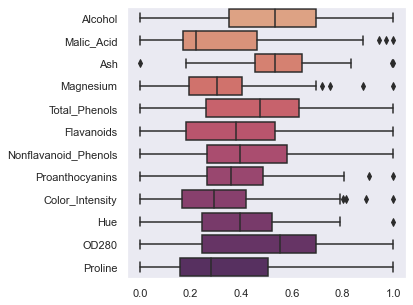

In [608]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(5,5))
sns.set_style("dark")
sns.boxplot(data=wine_norm.drop(['Ash_Alcanity'], axis=1), orient="h", palette = 'flare')

In [609]:
#wine_norm_nooutlier = wine_norm[0:0]
wine_norm_nooutlier = wine_norm

###### Malic_Acid

In [610]:
# Detection of outliers (find limits for salary based on IQR)
IQR = wine_norm['Malic_Acid'].quantile(0.75) - wine_norm['Malic_Acid'].quantile(0.25)
upper_limit = wine_norm['Malic_Acid'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Malic_Acid']>upper_limit]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
123  0.531579    1.000000  0.411765      0.561856   0.173913       0.565517   
137  0.394737    0.942688  0.684492      0.742268   0.282609       0.279310   
173  0.705263    0.970356  0.582888      0.510309   0.271739       0.241379   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
123    0.487342              0.320755         0.504732         0.112628   
137    0.054852              0.943396         0.217666         0.317406   
173    0.056962              0.735849         0.205047         0.547782   

          Hue     OD280   Proline  
123  0.203252  0.670330  0.072753  
137  0.276423  0.153846  0.169044  
173  0.130081  0.172161  0.329529

In [611]:
wine_norm_nooutlier['Malic_Acid'] = np.where(wine_norm['Malic_Acid']>upper_limit,upper_limit,wine_norm['Malic_Acid'])

###### Ash

In [612]:
IQR = wine_norm['Ash'].quantile(0.75) - wine_norm['Ash'].quantile(0.25)
upper_limit = wine_norm['Ash'].quantile(0.75) + (IQR * 1.4)
lower_limit = wine_norm['Ash'].quantile(0.25) - (IQR * 1.5)
wine_norm[(wine_norm['Ash']<lower_limit)| (wine_norm['Ash']>upper_limit)]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
25   0.531579    0.258893  0.994652      0.742268   0.586957       0.568966   
59   0.352632    0.039526  0.000000      0.000000   0.195652       0.344828   
121  0.139474    0.258893  1.000000      0.922680   0.532609       0.758621   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
25     0.493671              0.641509         0.476341         0.196246   
59     0.048523              0.283019         0.003155         0.057167   
121    1.000000              0.641509         0.460568         0.402730   

          Hue     OD280   Proline  
25   0.528455  0.706960  0.393723  
59   0.463415  0.201465  0.172611  
121  0.365854  0.886447  0.133381

In [613]:
wine_norm_nooutlier['Ash'] = np.where(wine_norm['Ash']>upper_limit,upper_limit,np.where(wine_norm['Ash']<lower_limit,lower_limit,wine_norm['Ash']))

###### Magnesium

In [614]:
IQR = wine_norm['Magnesium'].quantile(0.75) - wine_norm['Magnesium'].quantile(0.25)
upper_limit = wine_norm['Magnesium'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Magnesium']>upper_limit]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
69  0.310526    0.088933  0.208556      0.319588   0.880435       0.300000   
73  0.515789    0.183794  0.663102      1.000000   0.750000       0.800000   
78  0.342105    0.049407  0.315508      0.216495   0.717391       0.317241   
95  0.378947    0.154150  0.449198      0.432990   1.000000       0.524138   

    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
69    0.198312              0.018868         0.659306         0.133959   
73    0.537975              0.150943         0.488959         0.176621   
78    0.318565              0.415094         0.741325         0.180887   
95    0.407173              0.358491         0.905363         0.112628   

         Hue     OD280   Proline  
69  0.650407  0.659341  0.313837  
73  0.674797  0.816850  0.504280  
78  0.471545  0.380952  0.336662  
95  0.552846  0.498168  0.470043

In [615]:
wine_norm_nooutlier['Magnesium'] = np.where(wine_norm['Magnesium']>upper_limit,upper_limit,wine_norm['Magnesium'])

###### Proanthocyanins

In [616]:
IQR = wine_norm['Proanthocyanins'].quantile(0.75) - wine_norm['Proanthocyanins'].quantile(0.25)
upper_limit = wine_norm['Proanthocyanins'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Proanthocyanins']>upper_limit]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
95   0.378947    0.154150  0.449198      0.432990   0.711957       0.524138   
110  0.113158    0.592885  0.245989      0.458763   0.402174       0.758621   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
95     0.407173              0.358491         0.905363         0.112628   
110    0.472574              0.207547         1.000000         0.138225   

          Hue     OD280   Proline  
95   0.552846  0.498168  0.470043  
110  0.219512  0.564103  0.202568

In [617]:
wine_norm_nooutlier['Proanthocyanins'] = np.where(wine_norm['Proanthocyanins']>upper_limit,upper_limit,wine_norm['Proanthocyanins'])

###### Color_Intensity

In [618]:
IQR = wine_norm['Color_Intensity'].quantile(0.75) - wine_norm['Color_Intensity'].quantile(0.25)
upper_limit = wine_norm['Color_Intensity'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Color_Intensity']>upper_limit]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
151  0.463158    0.381423  0.598930      0.587629   0.456522       0.172414   
158  0.871053    0.185771  0.716578      0.742268   0.304348       0.627586   
159  0.644737    0.183794  0.684492      0.613402   0.206522       0.558621   
166  0.636842    0.584980  0.663102      0.639175   0.445652       0.248276   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
151    0.215190              0.207547         0.268139         0.812287   
158    0.204641              0.754717         0.722397         1.000000   
159    0.160338              0.735849         0.593060         0.893345   
166    0.122363              0.566038         0.331230         0.802048   

          Hue     OD280   Proline  
151  0.000000  0.073260  0.144080  
158  0.073171  0.252747  0.272468  
159  0.073171  0.186813  0.243937  
166  0.300813  0.106227  0.297432

In [619]:
wine_norm_nooutlier['Color_Intensity'] = np.where(wine_norm['Color_Intensity']>upper_limit,upper_limit,wine_norm['Color_Intensity'])

###### Hue

In [620]:
IQR = wine_norm['Hue'].quantile(0.75) - wine_norm['Hue'].quantile(0.25)
upper_limit = wine_norm['Hue'].quantile(0.75) + (IQR * 1.5)
wine_norm[wine_norm['Hue']>upper_limit]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
115      0.0    0.152174  0.449198      0.561856   0.163043       0.510345   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
115    0.386076              0.735849         0.504732         0.052901  1.0   

        OD280   Proline  
115  0.586081  0.092011

In [621]:
wine_norm_nooutlier['Hue'] = np.where(wine_norm['Hue']>upper_limit,upper_limit,wine_norm['Hue'])

<AxesSubplot:>

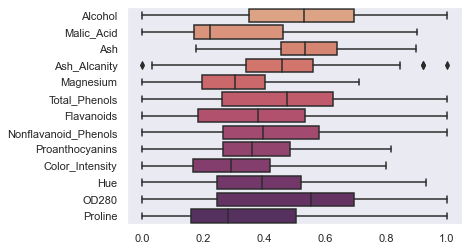

In [622]:
sns.boxplot(data=wine_norm_nooutlier, orient="h", palette = 'flare')

##### Gaussian Distributions

For normal distributions we will use 3 standard deviation interval to check for outliers.

###### Ash_Alcanity

<AxesSubplot:>

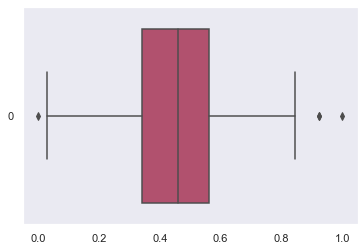

In [623]:
#View outliers for Gaussian distributions
sns.set_style("dark")
sns.boxplot(data=wine_norm['Ash_Alcanity'], orient="h", palette = 'flare')

In [624]:
lower_limit = wine_norm['Ash_Alcanity'].mean() - (3  * wine_norm['Ash_Alcanity'].std())
upper_limit = wine_norm['Ash_Alcanity'].mean() + (3  * wine_norm['Ash_Alcanity'].std())
wine_norm[(wine_norm['Ash_Alcanity']<lower_limit)| (wine_norm['Ash_Alcanity']>upper_limit)]

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
73  0.515789    0.183794  0.663102           1.0   0.711957            0.8   

    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
73    0.537975              0.150943         0.488959         0.176621   

         Hue    OD280  Proline  
73  0.674797  0.81685  0.50428

In [625]:
wine_norm_nooutlier['Ash_Alcanity'] = np.where(wine_norm['Ash_Alcanity']>upper_limit,upper_limit,np.where(wine_norm['Ash_Alcanity']<lower_limit,lower_limit,wine_norm['Ash_Alcanity']))

<AxesSubplot:>

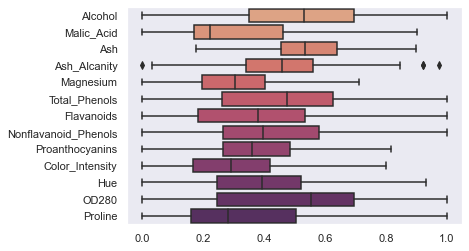

In [626]:
#View boxplot post outlier treatment
sns.boxplot(data=wine_norm_nooutlier, orient="h", palette = 'flare')

**Observations**  
* Outliers exist in 7 features 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity' and 'Hue'
* We will replace outliers and store in dataframe wine_norm_nooutlier and use for K-Means which is sensitive to distance         based outliers.
* For hierarchical clustering outliers are found from dendrogram, find out the objects which are in those cluster
  and consider those as outlier. Here cophenetic value is increased after removing outlier. We will create dendrogram in later   section to review.

### Multivariate Analysis

#### Pair-wise Scatter Plots

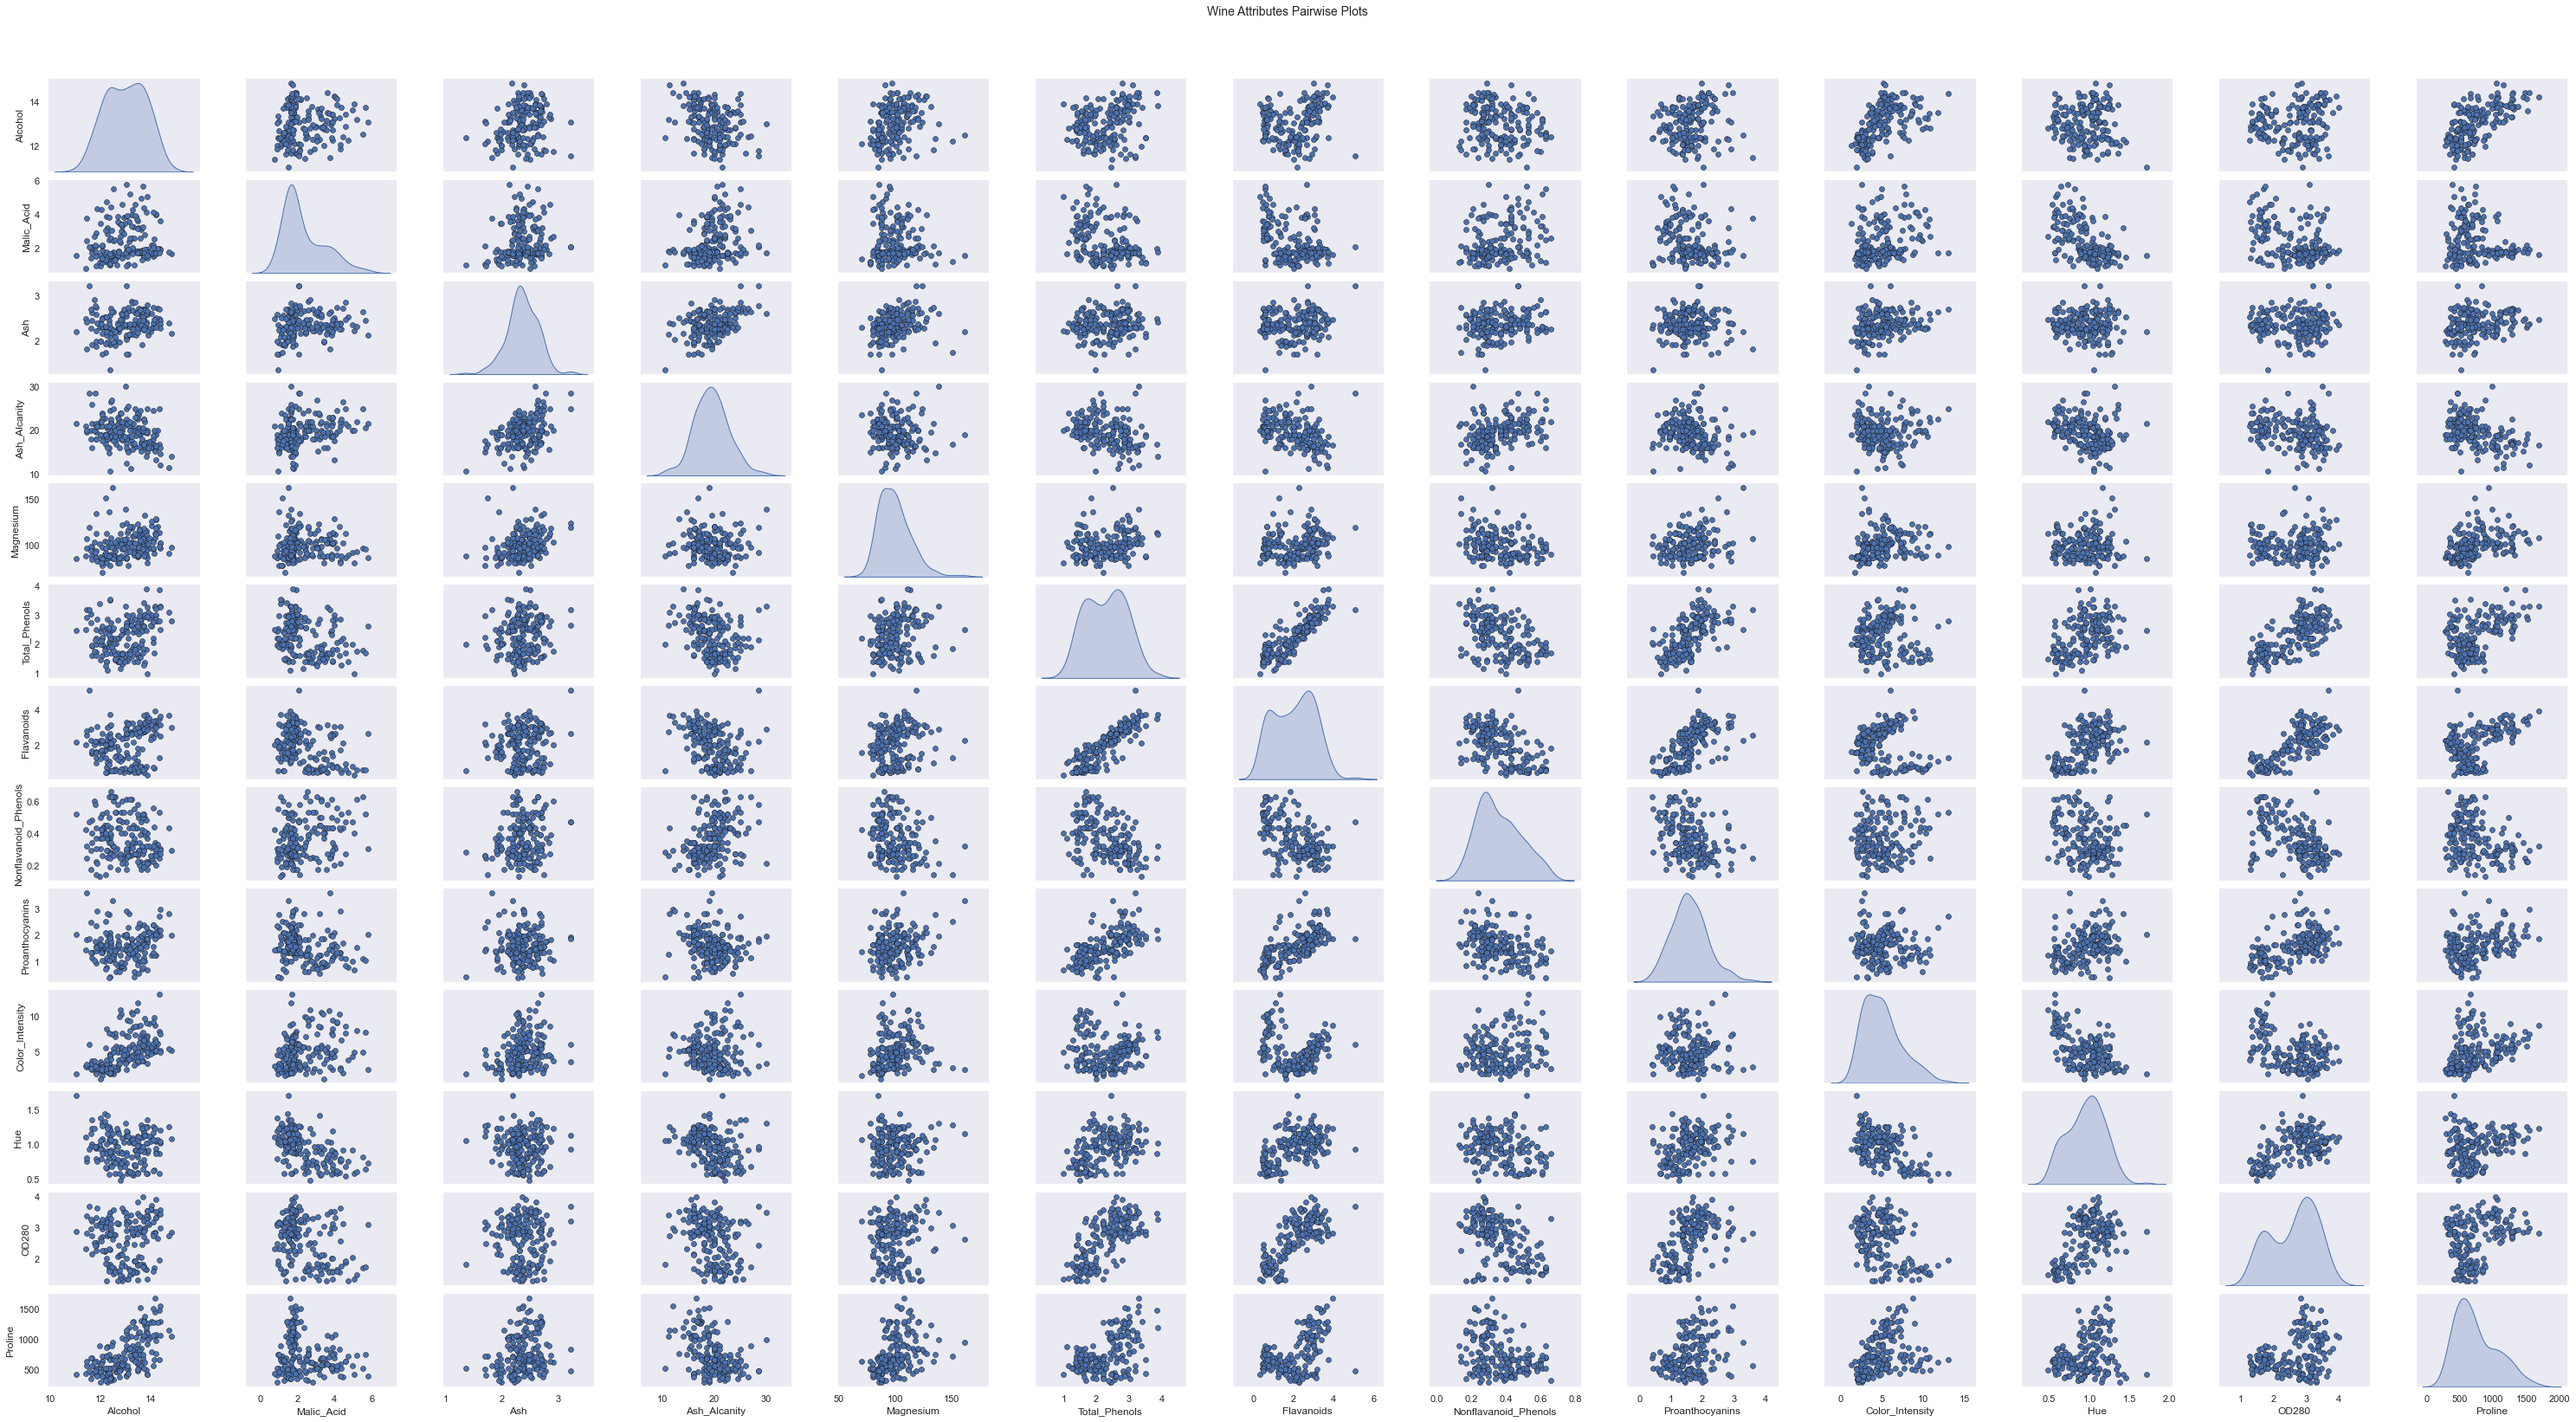

In [627]:
cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
pp = sns.pairplot(wine[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

#### Triangular Heat Map

<AxesSubplot:>

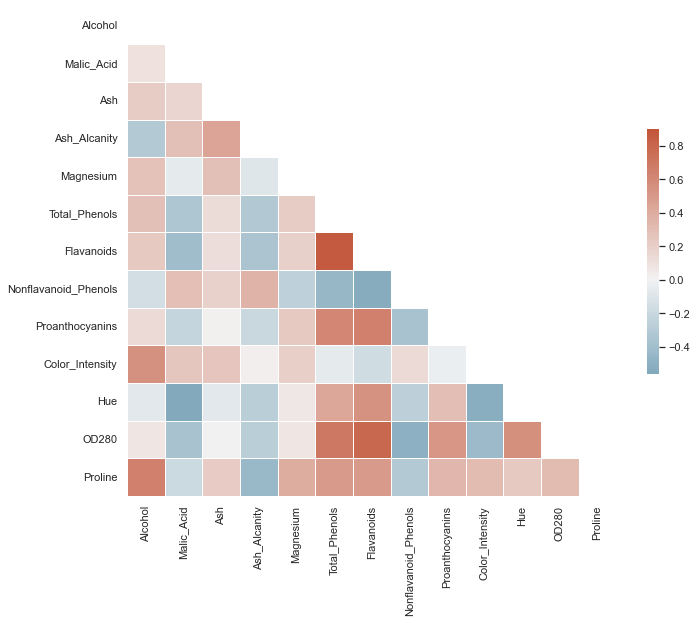

In [628]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(wine.corr(), dtype=bool))

corr= wine.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation matrix

In [629]:
wine.corr(method ='pearson')

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   

                       Proline  
Alcohol               0.643720  
Malic_Acid           -0.192011  
Ash                   0.223626  
Ash_Alcanity         -0.440597  
Magnesium             0.393351  
Total_Phenols         0.498115  
Flavanoids            0.494193  
Nonflavanoid_Phenols -0.311385  
Proanthocyanins       0.330417  
Color_Intensity       0.316100  
Hue                   0.236183  
OD280                 0.312761  
Proline               1.000000

In [630]:
#Get only highly correlated items

df = wine.corr().abs().round(1)
df = wine.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df

Alcohol Malic_Acid   Ash Ash_Alcanity Magnesium  \
Alcohol                  1.0       blah  blah         blah      blah   
Malic_Acid              blah        1.0  blah         blah      blah   
Ash                     blah       blah   1.0         blah      blah   
Ash_Alcanity            blah       blah  blah          1.0      blah   
Magnesium               blah       blah  blah         blah       1.0   
Total_Phenols           blah       blah  blah         blah      blah   
Flavanoids              blah       blah  blah         blah      blah   
Nonflavanoid_Phenols    blah       blah  blah         blah      blah   
Proanthocyanins         blah       blah  blah         blah      blah   
Color_Intensity          0.5       blah  blah         blah      blah   
Hue                     blah       -0.6  blah         blah      blah   
OD280                   blah       blah  blah         blah      blah   
Proline                  0.6       blah  blah         blah      blah   

                     Total_Phenols Flavanoids Nonflavanoid_Phenols  \
Alcohol                       blah       blah                 blah   
Malic_Acid                    blah       blah                 blah   
Ash                           blah       blah                 blah   
Ash_Alcanity                  blah       blah                 blah   
Magnesium                     blah       blah                 blah   
Total_Phenols                  1.0        0.9                 blah   
Flavanoids                     0.9        1.0                 -0.5   
Nonflavanoid_Phenols          blah       -0.5                  1.0   
Proanthocyanins                0.6        0.7                 blah   
Color_Intensity               blah       blah                 blah   
Hue                           blah        0.5                 blah   
OD280                          0.7        0.8                 -0.5   
Proline                        0.5        0.5                 blah   

                     Proanthocyanins Color_Intensity   Hue OD280 Proline  
Alcohol                         blah             0.5  blah  blah     0.6  
Malic_Acid                      blah            blah  -0.6  blah    blah  
Ash                             blah            blah  blah  blah    blah  
Ash_Alcanity                    blah            blah  blah  blah    blah  
Magnesium                       blah            blah  blah  blah    blah  
Total_Phenols                    0.6            blah  blah   0.7     0.5  
Flavanoids                       0.7            blah   0.5   0.8     0.5  
Nonflavanoid_Phenols            blah            blah  blah  -0.5    blah  
Proanthocyanins                  1.0            blah  blah   0.5    blah  
Color_Intensity                 blah             1.0  -0.5  blah    blah  
Hue                             blah            -0.5   1.0   0.6    blah  
OD280                            0.5            blah   0.6   1.0    blah  
Proline                         blah            blah  blah  blah     1.0

**Observations**  
* We can see that Flavanoids and OD280 have high correlation with most other ingredients.
* Flavanoids and Total_Phenols have very high positive correlation (0.9)
* Flavanoids and OD280  have moderately high positive correlation (0.8)
* Proanthocyanins and Flavanoids have very high positive correlation (0.7)
* Nonflavanoid_Phenols and Flavanoids have moderately high negative correlation (-0.5)
* OD280 and Nonflavanoid_Phenols have moderately high negative correlation (-0.5)

## Transform Input vectors

In [631]:
# Scaling - Standardize the numerical variables 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

yeojohnson = ColumnTransformer([
    ('ptransform',PowerTransformer(method='yeo-johnson', standardize=False), slice(0,13))
])

scaling = ColumnTransformer([
    ('scale',StandardScaler(), slice(0,13))
])


## Create Pipeline

In [632]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('yeojohnson',yeojohnson),
    ('scaling',scaling)
])

In [633]:
# Apply the tranformation
wine_transformed = pipe.fit_transform(wine_norm_nooutlier) 

In [634]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, wine.shape, wine_transformed.shape))

(0, 0)

In [635]:
# View sample records after transformation
wine_transformed[0:2,:]

array([[ 1.52186248, -0.4571062 ,  0.21716566, -1.18295054,  1.78293713,
         0.81955072,  1.03238764, -0.6043161 ,  1.23962733,  0.45094198,
         0.36557907,  2.04916349,  1.0840084 ],
       [ 0.24413997, -0.3600012 , -0.87580777, -2.65671684,  0.17582568,
         0.59005029,  0.74199479, -0.80180008, -0.50800574, -0.13675258,
         0.40978717,  1.15193108,  1.05047556]])

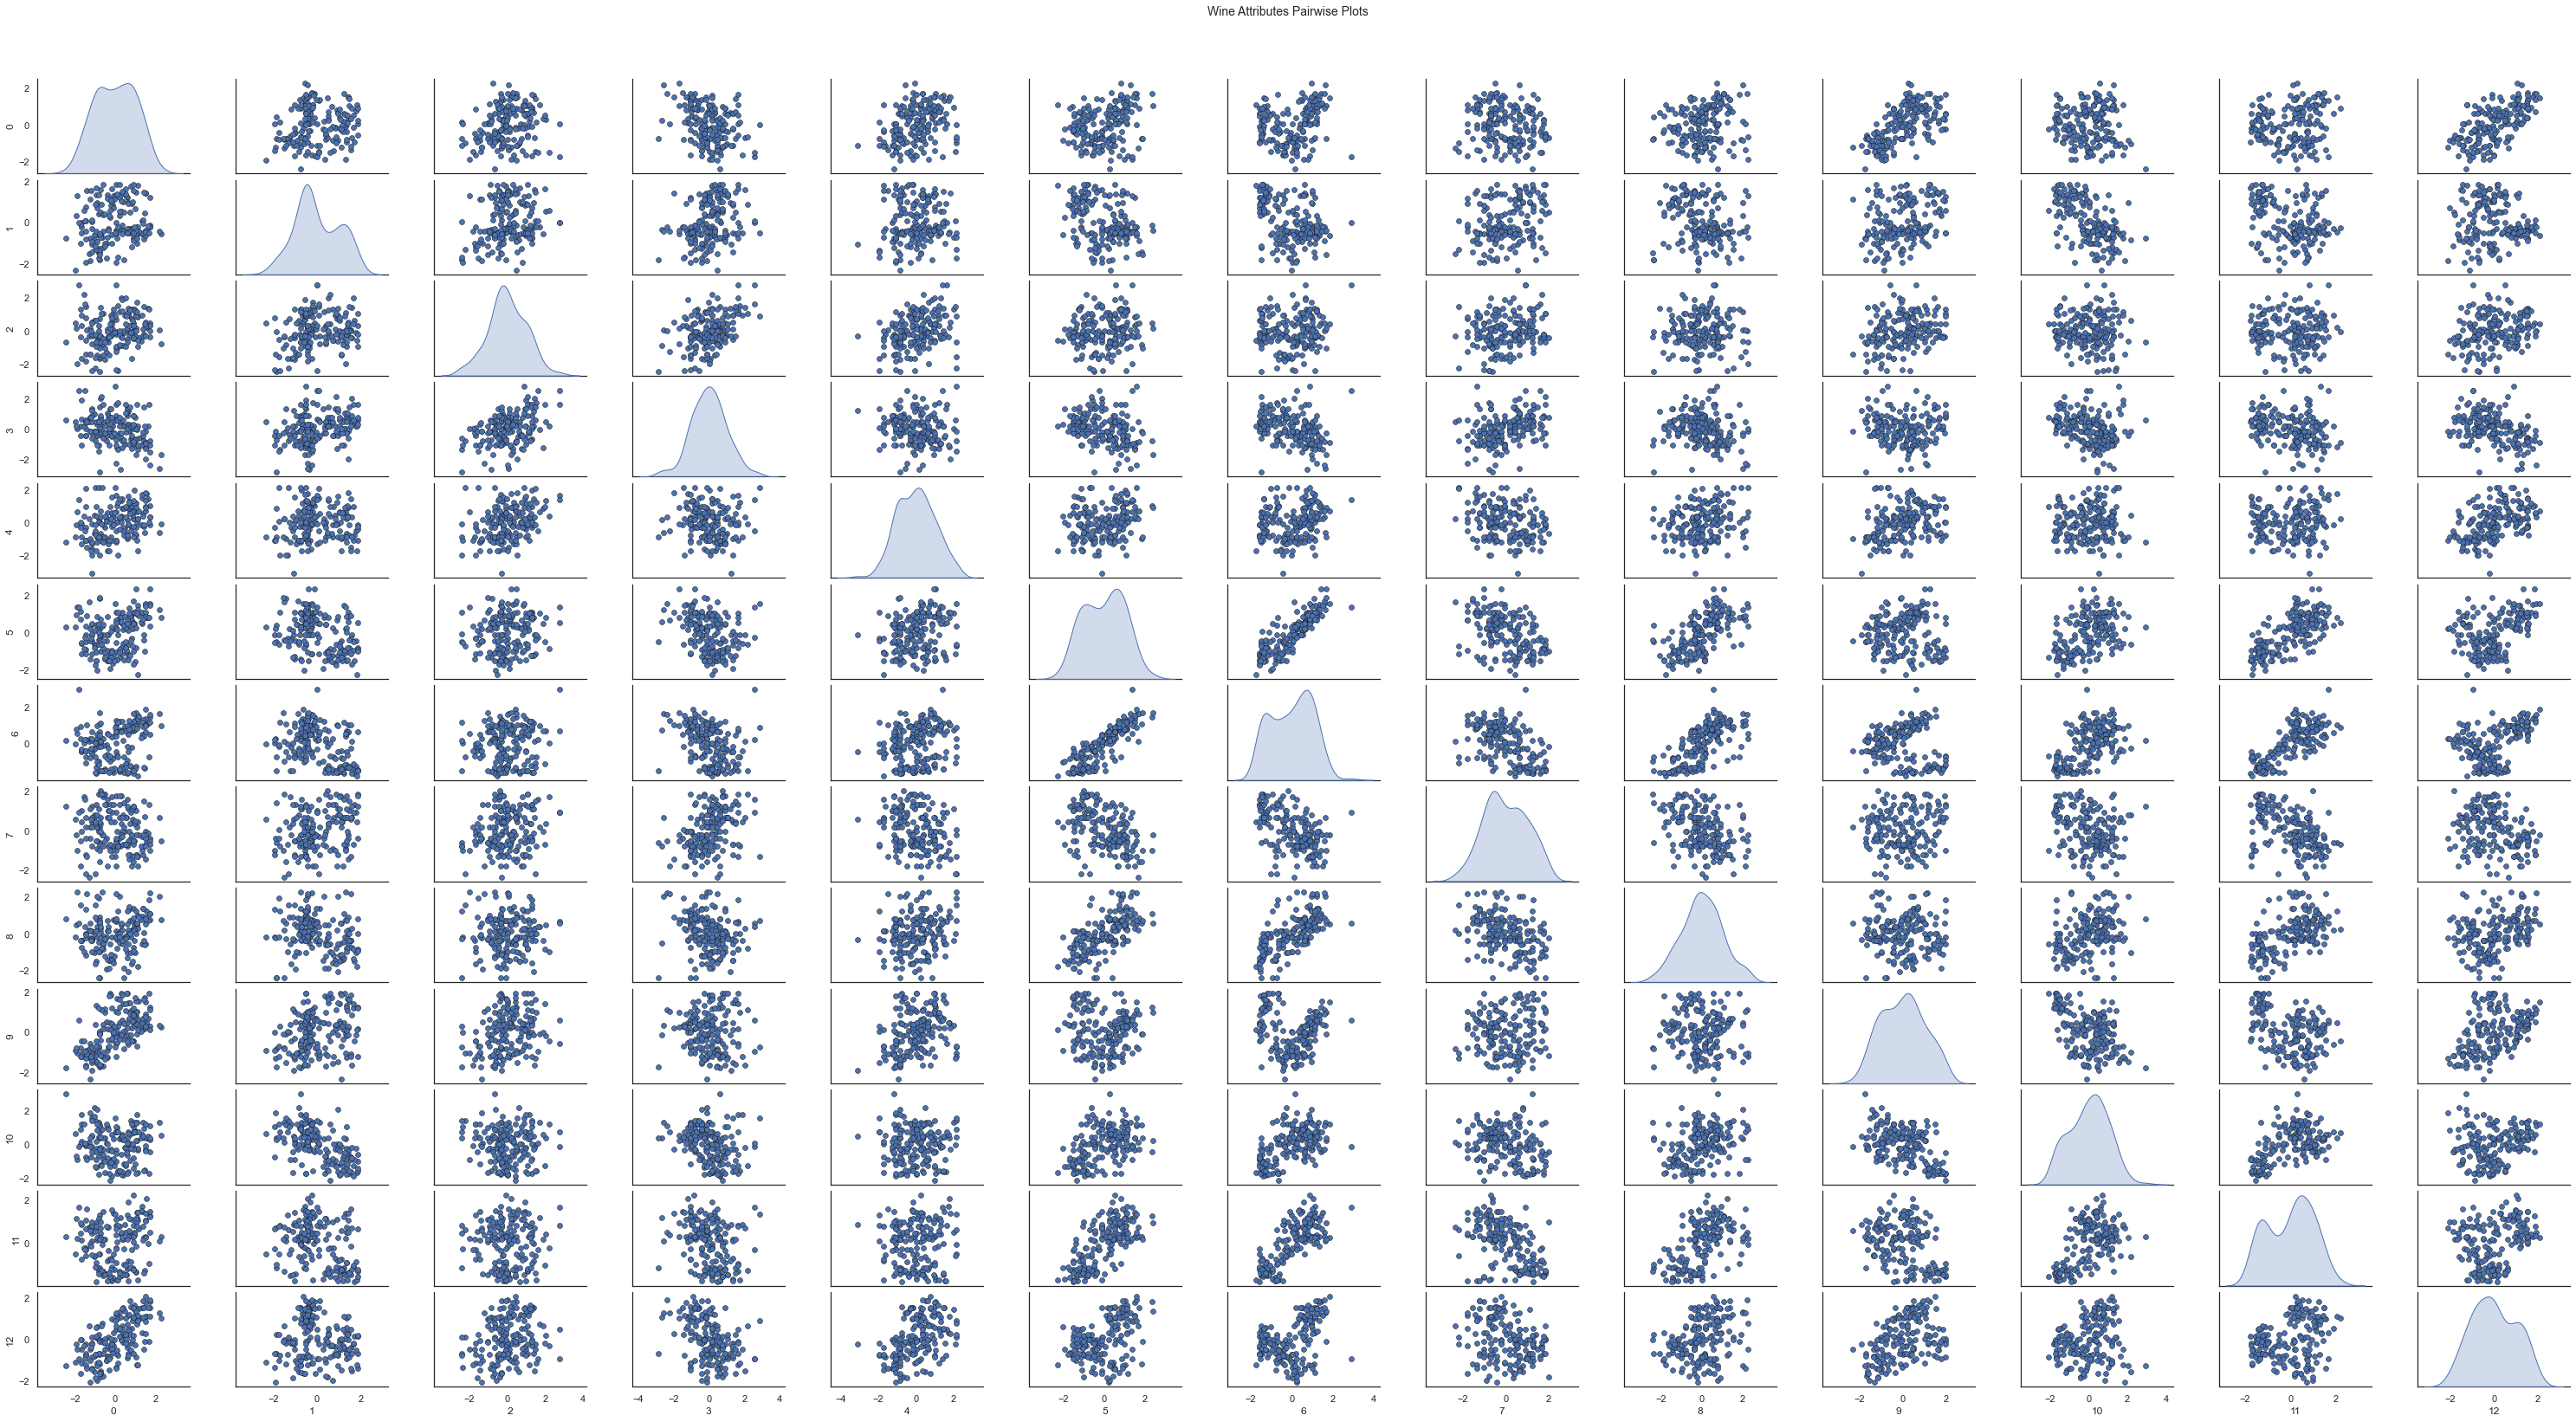

In [636]:
# Pair-wise Scatter Plots
wt = pd.DataFrame(wine_transformed)
pp = sns.pairplot(wt, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [637]:
# View Tranformation steps
pipe.named_steps

{'yeojohnson': ColumnTransformer(transformers=[('ptransform',
                                  PowerTransformer(standardize=False),
                                  slice(0, 13, None))]),
 'scaling': ColumnTransformer(transformers=[('scale', StandardScaler(),
                                  slice(0, 13, None))])}

## Fit the model and Analyze

### Agglomerative Clustering

#### View Dendrogram

In [638]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

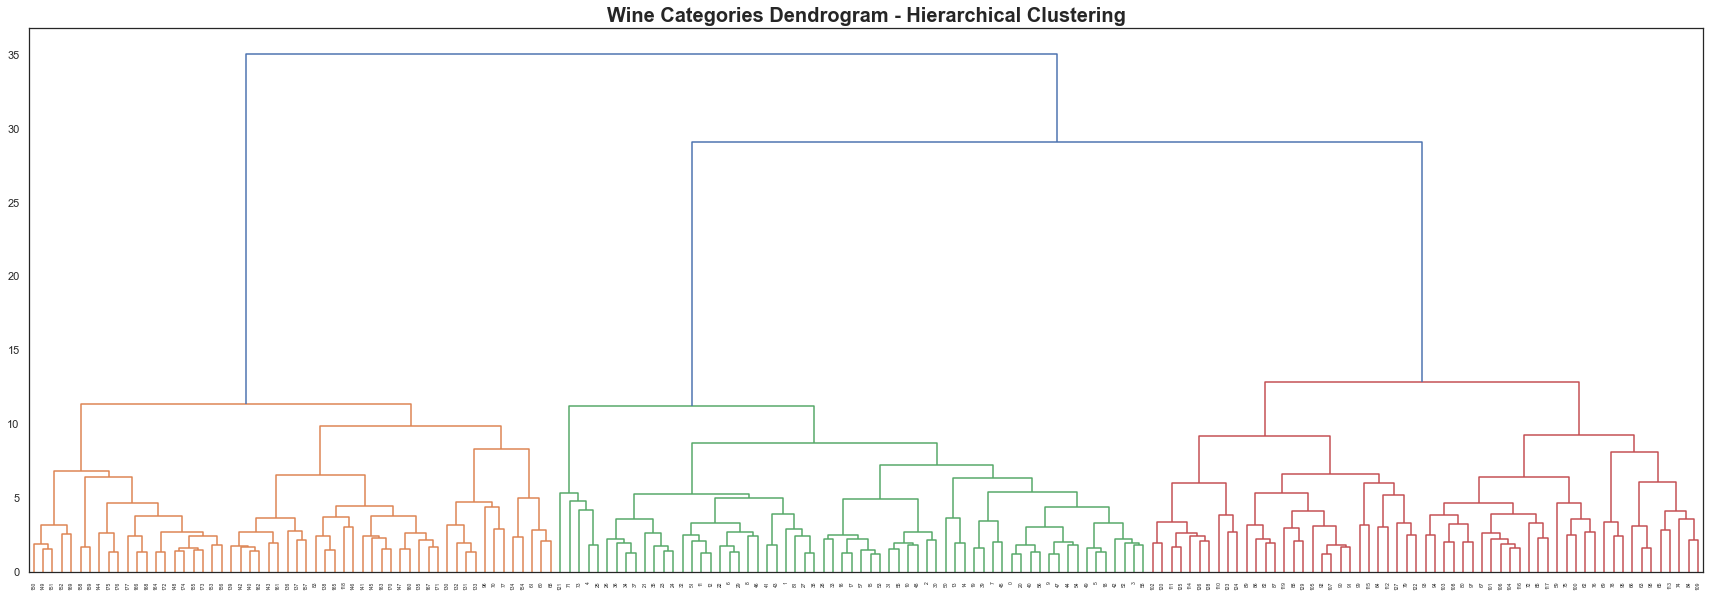

In [639]:
Z = linkage(wine_transformed, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Wine Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [640]:
#Function to plot truncated dendrogram
def plot_dendrogram(model, **kwargs):
  
    count = np.zeros(model.children_.shape[0])
    nsamples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        currentcount = 0
        for child_idx in merge:
            if child_idx < nsamples:
                currentcount += 1  
            else:
                currentcount += count[child_idx - nsamples]
        count[i] = currentcount

    linkagematrix = np.column_stack(
        [model.children_, model.distances_, count]
    ).astype(float)
    dendrogram(linkagematrix, **kwargs)    

#### Evaluate with Hyperparameters

We will evaluate the clustering fit based on the scores below, by tuning hyperparameters - number of clusters and Linkage.

##### Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

(Reference : https://scikit-learn.org/)

* **The Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance    (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between     a sample and the nearest cluster that sample is not part of    
* **Calinski Harabasz Score** The score is defined as ratio between the within-cluster dispersion and the between-cluster            dispersion  
* **Davies Bouldin Score** The score is defined as the average similarity measure of each cluster with its most similar             cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are       farther apart and less dispersed will result in a better score.    
* **Cophenetic Correlation Coefficient:** If the cluster is good then the linking of objects in the cluster tree should have a     strong correlation with the distances between objects in the distance vector.

In [641]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Defining a function to find the optimal number of clusters' n_clusters parameter
# Note that we are using a dataset that contains only numeric features. 

def agglomerationScorecard(transformed_df):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    cal_har_scores =[]
    dav_boulds =[]
    clusters=[]
    linkages1 = []
    totals = []
    cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:                      
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(transformed_df)
            silhouette_avg = silhouette_score(transformed_df, labels_)
            cal_har_score = calinski_harabasz_score(transformed_df, labels_)
            dav_bould = davies_bouldin_score(transformed_df, labels_) 
            Z = linkage(transformed_df, method = link, metric = 'euclidean')
            cophenetic, coph_dists = cophenet(Z, pdist(transformed_df))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            cal_har_scores.append(cal_har_score)
            dav_boulds.append(dav_bould)
            totals.append(silhouette_avg + cal_har_score + dav_bould )
            cophenetics.append(cophenetic) 
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    scorecard['calinski_harabasz'] =cal_har_scores
    scorecard['davies_bouldin']  = dav_boulds
    scorecard['Total']  = totals
    scorecard['cophenetic']  = cophenetics
    return scorecard

In [642]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(wine_transformed)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

clusters   linkage  silhouette  calinski_harabasz  davies_bouldin  \
0          3      ward    0.293201          71.095458        1.372663   
1          2      ward    0.262192          63.633571        1.424275   
2          2  complete    0.262608          63.156718        1.446879   
3          4      ward    0.251862          54.430505        1.789131   
4          4   average    0.284821          48.595785        1.162594   
5          5      ward    0.192802          45.405207        1.970241   
6          5   average    0.284615          40.290408        1.183679   
7          3  complete    0.229210          36.650849        1.303740   
8          4  complete    0.213750          36.258628        1.620368   
9          3   average    0.252560          34.178214        1.118298   
10         5  complete    0.184646          31.390686        1.460132   
11         2   average    0.271903           2.706829        0.594303   
12         2    single    0.271903           2.706829        0.594303   
13         3    single    0.172529           2.620435        0.609861   
14         4    single    0.096269           2.406642        0.652734   
15         5    single    0.033037           2.174207        0.705462   

        Total  cophenetic  
0   72.761322    0.698141  
1   65.320038    0.698141  
2   64.866205    0.698032  
3   56.471498    0.698141  
4   50.043200    0.767039  
5   47.568251    0.698141  
6   41.758701    0.767039  
7   38.183798    0.698032  
8   38.092746    0.698032  
9   35.549072    0.767039  
10  33.035463    0.698032  
11   3.573035    0.767039  
12   3.573035    0.459666  
13   3.402824    0.459666  
14   3.155645    0.459666  
15   2.912706    0.459666

**Observations:**  
* We find the top three records with ward linkage. Though the cophenetic score is highest for average linkage the other metrics   for average linkage is poor. We settle for second best  cophenetic score for ward(0.662349)  
* We analyze the top two winners in  the above scorecard (3 clusters) and (2 clusters) with ward linkage.  

In [643]:
#Add to compare models table
compare_models = pd.DataFrame()
df2 = {'model': 'Agglomerative', 'silhouette': s['silhouette'][0], 'calinski_harabasz': s['calinski_harabasz'][0],'davies_bouldin': s['davies_bouldin'][0]}
compare_models = compare_models.append(df2, ignore_index = True)

In [644]:
compare_models

model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.293201          71.095458        1.372663

###### Option 1: Three Clusters

* Silhouette score, calinski_harabasz_score and davies_bouldin_score are highest for 3 clusters with ward linkage.

In [645]:
cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(wine_transformed)

In [646]:
# Data points spread
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [647]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 59],
       [ 1, 56],
       [ 2, 63]], dtype=int64)

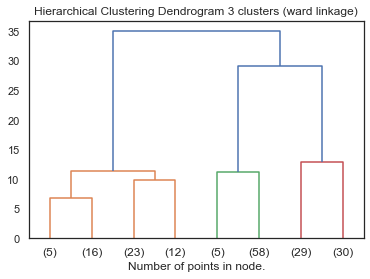

In [648]:
from scipy.cluster.hierarchy import dendrogram
plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=2)
plt.xlabel("Number of points in node.")
plt.show()

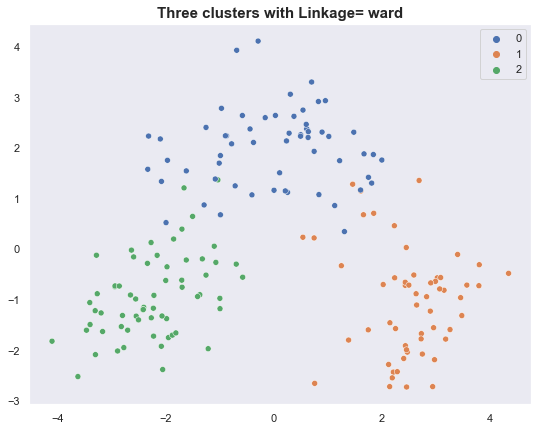

In [649]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Three clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

###### Option 2: Two Clusters

* Silhouette score, calinski_harabasz_score and davies_bouldin_score are second highest for 2 clusters with ward linkage.

In [650]:
cluster = AgglomerativeClustering(n_clusters=2 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(wine_transformed)

In [651]:
# Data points spread
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [652]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 122],
       [  1,  56]], dtype=int64)

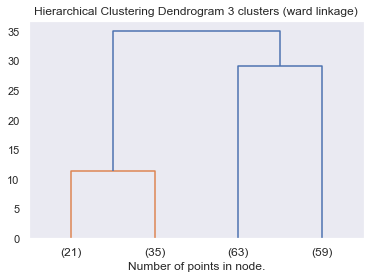

In [653]:
plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
# plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=1)
plt.xlabel("Number of points in node.")
plt.show()

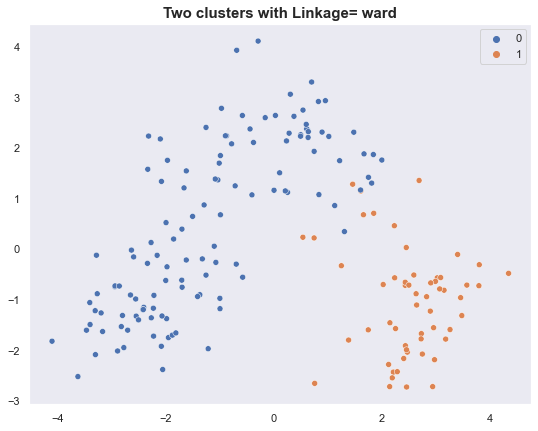

In [654]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=2)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Two clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

### K Means Clustering

We use the WSS to determine candidates for the number of clusters. k-means++ for faster/efficient convergence.

#### Evaluate k with Elbow Graph

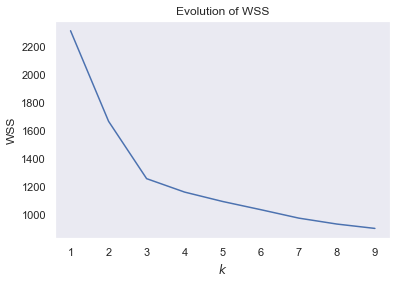

In [655]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(wine_transformed)
    y_kmeans = kmeans.predict(wine_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

**Observations:**
The elbow graph indicates an optima of 3 clusters

#### Apply K Means clustering

In [656]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=3, random_state=2)
kmeans.fit(wine_transformed)
y_kmeans = kmeans.predict(wine_transformed)

In [657]:
# Data points spread
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [658]:
# Data points count per label
unique, counts = np.unique(y_kmeans, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 51],
       [ 1, 62],
       [ 2, 65]], dtype=int64)

Aggloramative had resulted in 3 clusters with array  

0 : 59  
1:  56  
2:  63  


#### Visualize Scatter plot

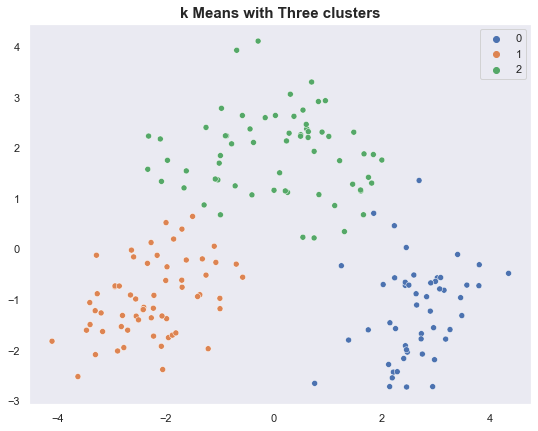

In [659]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

#### Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

In [660]:
# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 3 clusters separated by k Means
s = silhouette_score(wine_transformed, y_kmeans)
c = calinski_harabasz_score(wine_transformed, y_kmeans)
d = davies_bouldin_score(wine_transformed, y_kmeans) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

silhouette_score =  0.299 
calinski_harabasz_score =  73.57 
davies_bouldin_score =  1.359


In [661]:
#Add to compare models table
df3 = {'model': 'kMeans', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df3, ignore_index = True)
compare_models

model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.293201          71.095458        1.372663
1         kMeans    0.299467          73.570341        1.359208

Compare with top performer in agglomerative. k-means clustering has better silhouette_score and davies_bouldin_score for 3 clusters

### K Medoids Clustering

#### Evaluate k with Elbow Graph

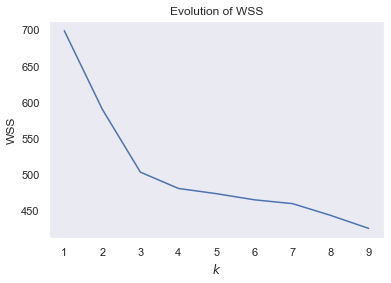

In [662]:
#pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
inertia = []
k = range(1,10)
for iter in k:
    kmedoids = KMedoids(n_clusters=iter, random_state=0).fit(wine_transformed)
    inertia.append(kmedoids.inertia_ ) # we already store this for later, inertia=WSS
plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

#### Apply K Medoid clustering

In [663]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(wine_transformed)
kmedoids.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [664]:
# Data points count per label
unique, counts = np.unique(kmedoids.labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 74],
       [ 1, 54],
       [ 2, 50]], dtype=int64)

#### Visualize the Scatter Plot

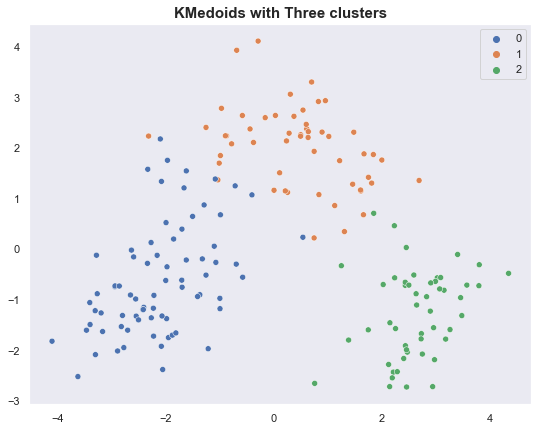

In [665]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmedoids.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("KMedoids with Three clusters",fontsize=15,fontweight="bold")
plt.show()

#### Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score

In [666]:
# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 3 clusters separated by k kmedoids
s = silhouette_score(wine_transformed, kmedoids.labels_)
c = calinski_harabasz_score(wine_transformed, kmedoids.labels_)
d = davies_bouldin_score(wine_transformed, kmedoids.labels_) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

silhouette_score =  0.289 
calinski_harabasz_score =  69.966 
davies_bouldin_score =  1.39


In [667]:
#Add to compare models table
df4 = {'model': 'kmedoids', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df4, ignore_index = True)
compare_models

model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.293201          71.095458        1.372663
1         kMeans    0.299467          73.570341        1.359208
2       kmedoids    0.288766          69.966094        1.389904

###  DBSCAN Clustering

#### Deciding Optimal value for epsilon

Plot different combinations of  𝑒𝑝𝑠𝑖𝑙𝑜𝑛  and  𝑚𝑖𝑛𝑃𝑡𝑠

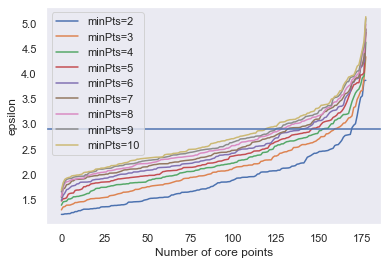

In [668]:
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(wine_transformed)
distances, indices = nbrs.kneighbors(wine_transformed)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)
#plt.axhline(2.7)
plt.legend()
plt.show()

The horizontal lines mark  𝑒𝑝𝑠𝑖𝑙𝑜𝑛=2.7  and  𝑒𝑝𝑠𝑖𝑙𝑜𝑛=3.4 , which look like good value for  𝑚𝑖𝑛𝑃𝑡𝑠=2 ,
respectively  𝑚𝑖𝑛𝑃𝑡𝑠=10 . We now look at the results of DBSCAN for these two combinations in the PCA.

#### Apply DBSCAN clustering

In [669]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(wine_transformed)
clusters = dbscan.labels_
len(set(clusters))

3

In [670]:
 clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [671]:
# Data points count per label
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1,   7],
       [  0, 168],
       [  1,   3]], dtype=int64)

In [672]:
s = silhouette_score(wine_transformed,clusters)
c = calinski_harabasz_score(wine_transformed, clusters)
d = davies_bouldin_score(wine_transformed, clusters) 
s,c,d

(0.09842783843541421, 3.093276940436289, 2.963746537752639)

We see that a single large cluster is formed and a weak silhouette_score. This may be due to equivalent densities across the   
regions which makes separation challenging.

In [673]:
#Add to compare models table
df5 = {'model': 'dbscan', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df5, ignore_index = True)
compare_models

model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.293201          71.095458        1.372663
1         kMeans    0.299467          73.570341        1.359208
2       kmedoids    0.288766          69.966094        1.389904
3         dbscan    0.098428           3.093277        2.963747

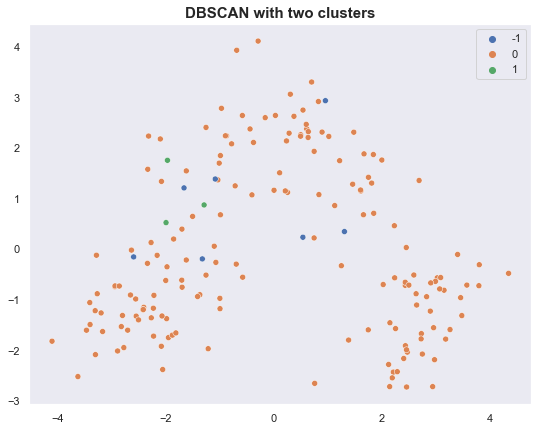

In [674]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()

### EM Clustering

#### Evaluate k with BIC

Determines a suitable number of clusters using the Bayesian Information Criterion (BIC).

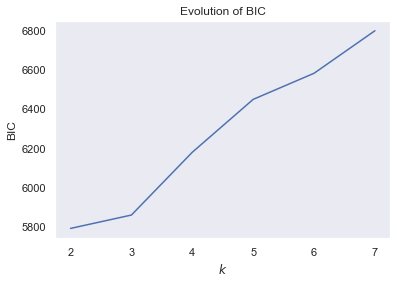

In [675]:
from sklearn.mixture import GaussianMixture

ks=range(2,8)
bic = []
for k in ks:
    em = GaussianMixture(n_components=k,random_state=42)
    em.fit(wine_transformed)
    bic.append(em.bic(wine_transformed))

plt.figure()
plt.title("Evolution of BIC")
plt.plot(ks, bic)
plt.ylabel("BIC")
plt.xlabel("$k$")
plt.xticks(ks)
plt.show()

The BIC clearly indicates that 3 would be the optimal number of clusters.

#### Apply Gaussian Mixture (Expectation-Maximization)

In [676]:
em = GaussianMixture(n_components=3,random_state=20)
em.fit(wine_transformed)
y_em = em.predict(wine_transformed)

In [677]:
y_em

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [678]:
# Data points count per label
unique, counts = np.unique(y_em, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 66],
       [ 1, 51],
       [ 2, 61]], dtype=int64)

#### Visualize the Scatter Plot

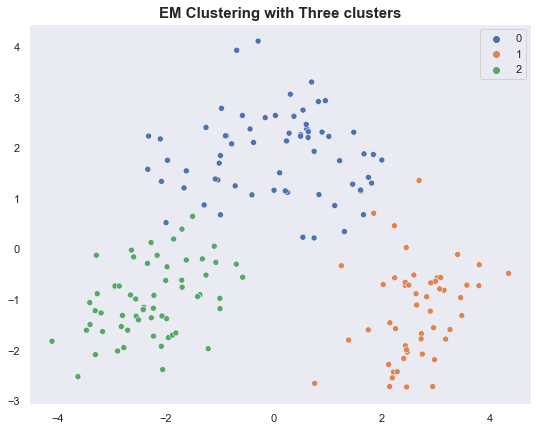

In [679]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(wine_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_em, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("EM Clustering with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [680]:
# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 3 clusters separated by k kmedoids
s = silhouette_score(wine_transformed, y_em)
c = calinski_harabasz_score(wine_transformed, y_em)
d = davies_bouldin_score(wine_transformed, y_em) 
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

silhouette_score =  0.298 
calinski_harabasz_score =  73.296 
davies_bouldin_score =  1.361


In [681]:
#Add to compare models table
df5 = {'model': 'EM', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df5, ignore_index = True)
compare_models

model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.293201          71.095458        1.372663
1         kMeans    0.299467          73.570341        1.359208
2       kmedoids    0.288766          69.966094        1.389904
3         dbscan    0.098428           3.093277        2.963747
4             EM    0.298467          73.296447        1.360651

Among the 5 models evaluated we see that kMeans has the best silhouette and 
Calinski harabasz scores followed by EM Gaussian Mixture. We choose kmeans with 3 clusters.

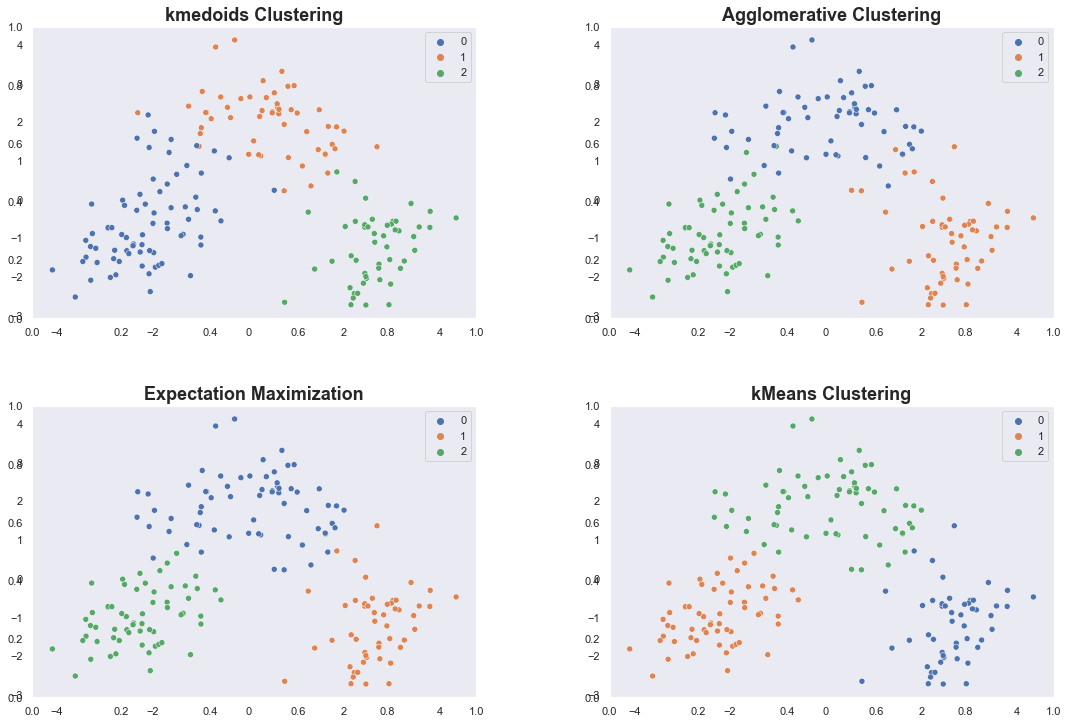

In [692]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,10))
fig.tight_layout()
axeslist = [221,222,223,224]

ax = fig.add_subplot(axeslist[0])
sns.scatterplot(hue=kmedoids.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep",ax= ax)
ax.set_title('kmedoids Clustering',fontweight="bold", size=18)

cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(wine_transformed)
ax = fig.add_subplot(axeslist[1])
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep",ax= ax)
ax.set_title('Agglomerative Clustering',fontweight="bold", size=18)

ax = fig.add_subplot(axeslist[2])
sns.scatterplot(hue=y_em, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep",ax= ax)
ax.set_title('Expectation Maximization',fontweight="bold", size=18)

ax = fig.add_subplot(axeslist[3])
sns.scatterplot(hue=y_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep",ax= ax)
ax.set_title('kMeans Clustering',fontweight="bold", size=18)


fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.3)
